In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
from math import sqrt

In [10]:
%matplotlib inline

#### Algunas definciones utiles

In [11]:
h, A = 0.9, 5
def SNR_a_sigma(SNR):
    return sqrt( h**2 * A** 2 / SNR )
def SNR_a_G(SNR):
    return 1/h * sqrt(SNR/(SNR+1))

In [12]:
p_err_digital = lambda SNR, n: (1-(1-2*norm.sf(sqrt(SNR)))**n)/2  
p_err_analog = lambda SNR, n: norm.sf(sqrt((1)/(1-(1-(1/SNR))**n)))

def p_err_analog(snr, n): #Calculo sacado del ejercicio 2
    sigma = SNR_a_sigma(snr)
    G = SNR_a_G(snr)
    suma = 0
    for i in range(1,n+1):
        suma += ((h*G)**(n-i))**2
    var_Z = sigma**2 * suma
    aux = h**n * A * G**(n-1) / sqrt(var_Z)
    
    return norm.sf(aux)

p_err_digital = np.vectorize(p_err_digital)
p_err_analog = np.vectorize(p_err_analog)

#### Me armo los rangos del eje x

In [13]:
# rango [-5,30] con paso 1
SNRs_dB = np.linspace(-5,30, num=36)

In [14]:
# SNRs en escala lineal
SNRs = 10**((SNRs_dB)/10)

In [15]:
# Distintos Ns, cada 4
Ns = np.arange(1, 26, 4)

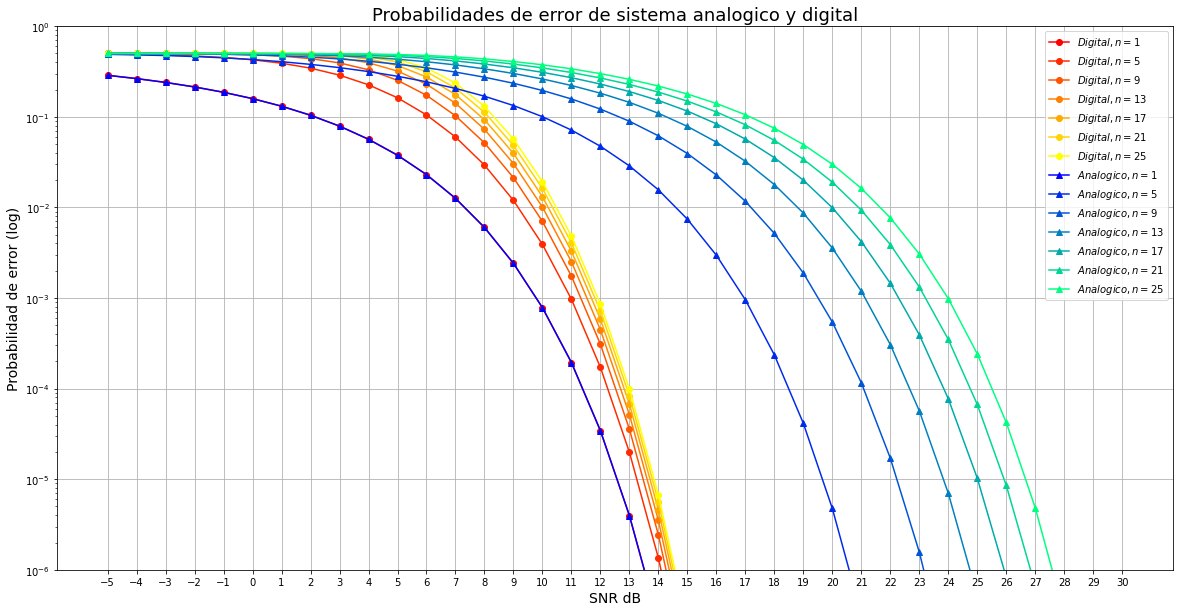

In [16]:
plt.figure(figsize=(20,10))

### Colors

digital_colors = iter((plt.get_cmap('autumn'))(np.linspace(0,1,len(Ns))))
analog_colors = iter((plt.get_cmap('winter'))(np.linspace(0,1,len(Ns))))

for n in Ns:
    plt.plot(SNRs_dB, p_err_digital(SNRs, n), 'o-', color=next(digital_colors), label='$Digital, n={}$'.format(n))    
for n in Ns:    
    plt.plot(SNRs_dB, p_err_analog(SNRs, n), '^-', color=next(analog_colors), label='$Analogico, n={}$'.format(n))

plt.xticks(SNRs_dB)
plt.ylim(ymin=10**-6)
plt.ylim(ymax=10**0)
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel("SNR dB", fontsize = 14)
plt.ylabel("Probabilidad de error (log)", fontsize = 14)
plt.title("Probabilidades de error de sistema analogico y digital", fontsize = 18)
plt.grid()
plt.savefig("Grafico 3-1.png")